In [1]:
import gps_particle_data
import wget
import os
import numpy as np 
import time
import json
import sys
import math
from datetime import datetime, timedelta, date
from itertools import compress
from random import randint
import urllib2
import aacgmv2

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
start_date = datetime(2013,1,1,0,0,0);
end_date = datetime(2013,5,1,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);


Loading data for satellite  53
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_130106_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_130113_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_130120_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_130127_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_130203_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_130210_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_130217_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_130224_v1.0

In [10]:
output_data = ms.get_all_data_by_satellite();
burst_events = ms.get_burst_events(output_data, 'proton');

eq_s = gps_particle_data.earthquake_search(start_date,end_date, min_magnitude=4,min_lat=-90,max_lat=90,min_lon=90,max_lon=180);

L_shells = eq_s.get_L_shells(500.0);
eq_datetimes = eq_s.get_datetimes();

datetimes_small_del_L = [];
eq = []

for ib, be in enumerate(burst_events):
    if(ib%20==0):
        print 'Burst #', ib, '/', len(burst_events);
        print 'Date : ', be.date;
        print 'L-shell : ', be.data['L_shell'];
   
    # Get the datetime spread
    pre_gap = timedelta(hours=-12);
    post_gap = timedelta(hours=12);
   
    start_date = be.date+pre_gap;
    end_date = be.date+post_gap;

    # Compare with EQs
    for i,info in enumerate(eq_s.earthquake_information):
        # Print the details of the Sumatran earthquake
        del_L = math.fabs(be.data['L_shell'] - L_shells[i]);
        del_time = eq_datetimes[i] - be.data['datetime'];
        time_test = (del_time<timedelta(days=10)) and (del_time>timedelta(days=-10));

        if( (del_L<0.1) and time_test):
            print 'Matching EQ... '
            print info;
            eq.append([be.data['datetime'], eq_datetimes[i], info[1]])
            print 'L_shell: ', be.data['L_shell'], L_shells[i];
            datetimes_small_del_L.append(be.data['datetime'] - eq_datetimes[i]);

Burst # 0 / 279
Date :  2013-04-11 09:34:00
L-shell :  5.638384
Matching EQ... 
['us2013pgdc' '2013-04-21T03:03:32.600' '-49.798' '116' '4.4' 'mb'
 'Western Indian-Antarctic Ridge']
L_shell:  5.638384 5.67051652223
Burst # 20 / 279
Date :  2013-04-11 10:54:00
L-shell :  10.27125
Matching EQ... 
['usp000k065' '2013-04-11T20:01:08.510' '74.297' '130.057' '4.5' 'mb'
 'Laptev Sea']
L_shell:  9.070091 9.13309743436
Burst # 40 / 279
Date :  2013-04-11 12:14:00
L-shell :  8.279066
Matching EQ... 
['us2013pgdc' '2013-04-21T03:03:32.600' '-49.798' '116' '4.4' 'mb'
 'Western Indian-Antarctic Ridge']
L_shell:  5.661453 5.67051652223
Matching EQ... 
['us2013pedp' '2013-04-19T05:42:58.060' '67.781' '142.215' '4.1' 'mb'
 '138km WSW of Druzhina, Russia']
L_shell:  5.492789 5.4092977107
Matching EQ... 
['us2013nqen' '2013-04-05T20:06:58.140' '-49.369' '125.085' '4.7' 'mb'
 'Western Indian-Antarctic Ridge']
L_shell:  5.492789 5.41231542947
Matching EQ... 
['us2013pedp' '2013-04-19T05:42:58.060' '67.781

Matching EQ... 
['usp000k082' '2013-04-15T22:43:40.870' '67.611' '142.899' '4.1' 'mb'
 'northeastern Sakha, Russia']
L_shell:  5.301652 5.34555758141
Matching EQ... 
['us2013nycx' '2013-04-13T02:58:43.780' '-49.256' '106.301' '4.2' 'mb'
 'Southeast Indian Ridge']
L_shell:  5.301652 5.37418874211
Matching EQ... 
['us2013nuen' '2013-04-09T00:00:31.370' '67.692' '142.403' '4.1' 'mb'
 '135km WSW of Druzhina, Russia']
L_shell:  5.301652 5.37575611458
Matching EQ... 
['usb000g0wg' '2013-04-05T20:38:22.870' '67.586' '142.873' '4.4' 'mb'
 '124km SW of Druzhina, Russia']
L_shell:  5.301652 5.33626814485
Matching EQ... 
['us2013pedp' '2013-04-19T05:42:58.060' '67.781' '142.215' '4.1' 'mb'
 '138km WSW of Druzhina, Russia']
L_shell:  5.470877 5.4092977107
Matching EQ... 
['us2013nycx' '2013-04-13T02:58:43.780' '-49.256' '106.301' '4.2' 'mb'
 'Southeast Indian Ridge']
L_shell:  5.470877 5.37418874211
Matching EQ... 
['us2013nuen' '2013-04-09T00:00:31.370' '67.692' '142.403' '4.1' 'mb'
 '135km WSW o

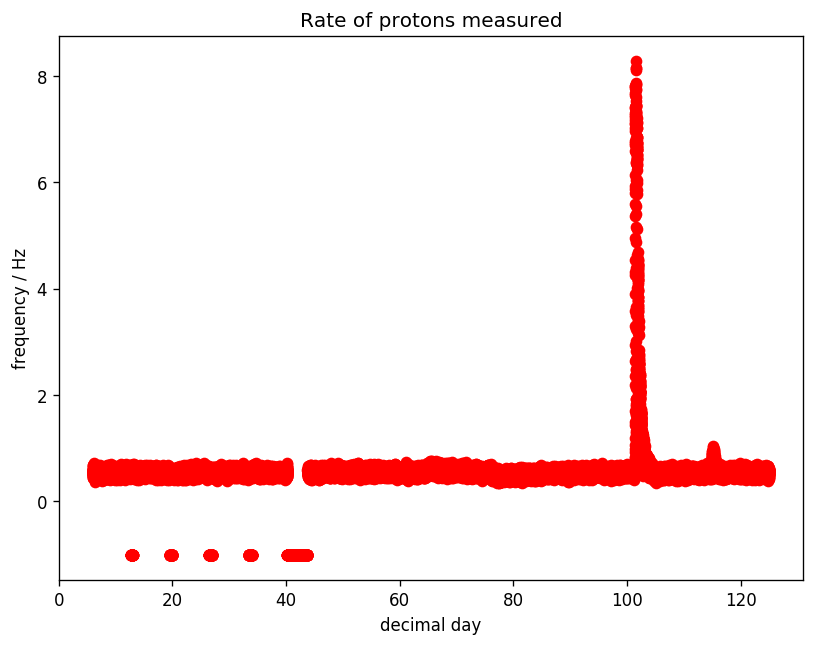

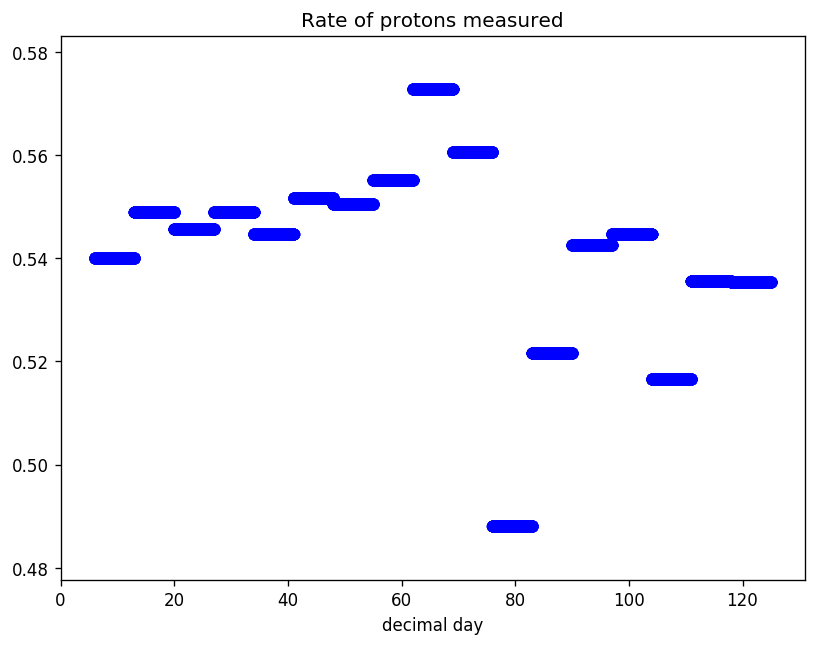

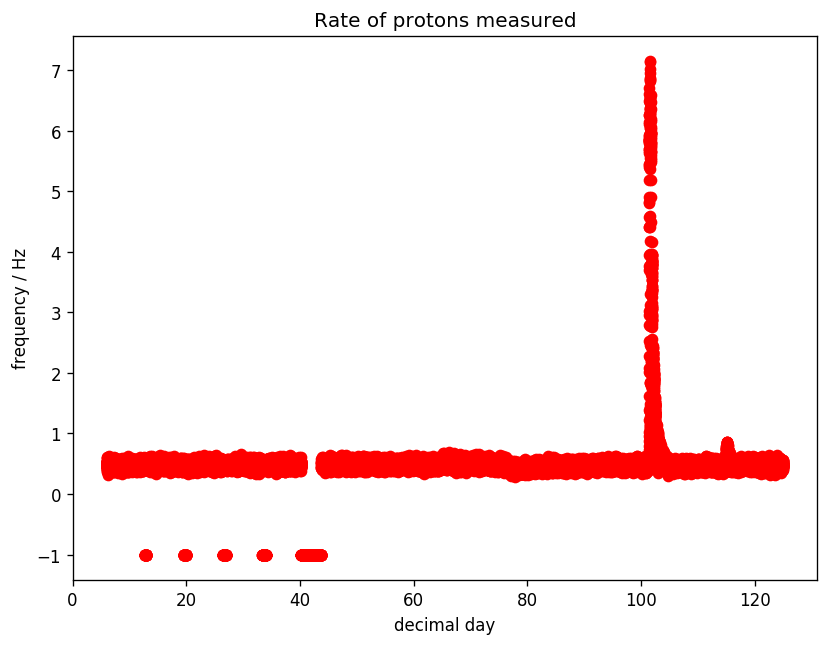

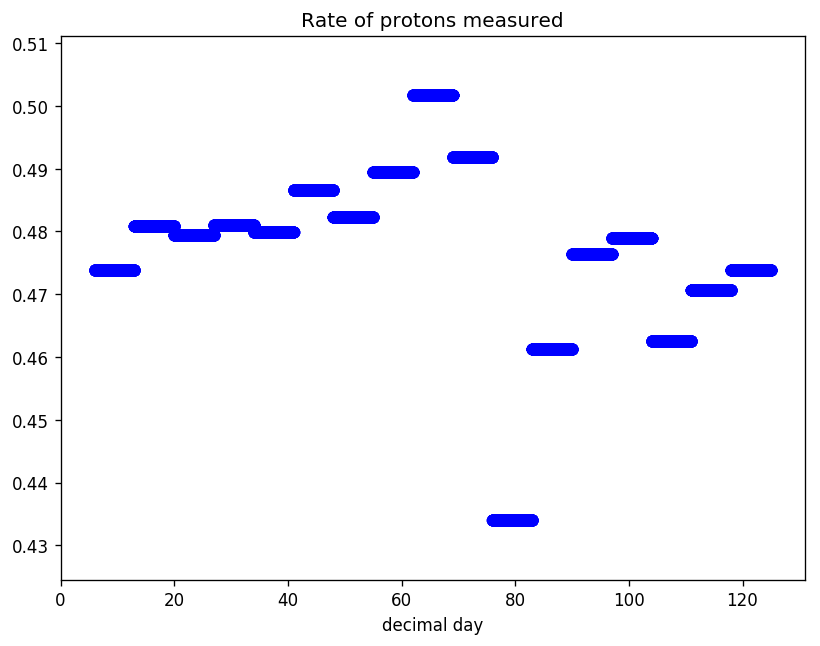

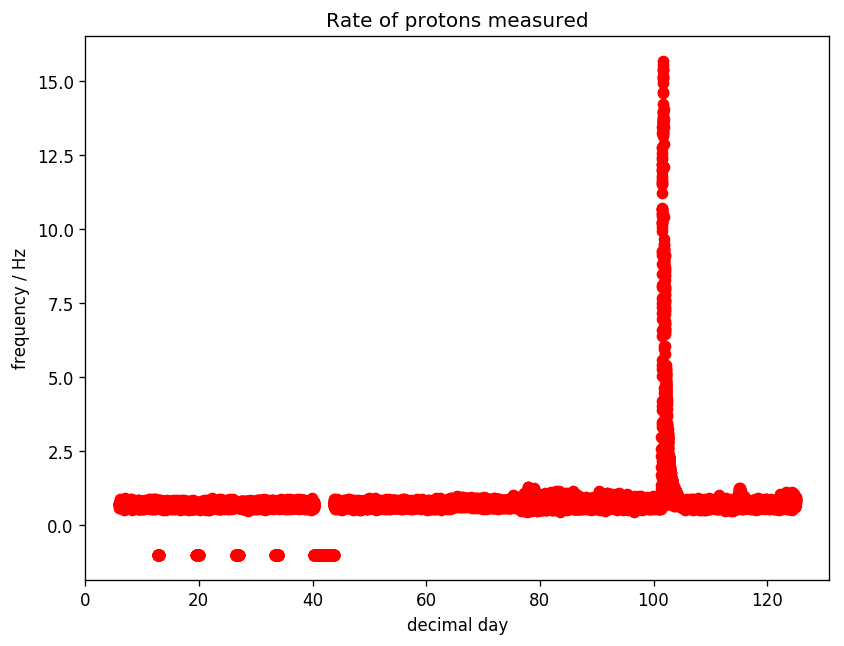

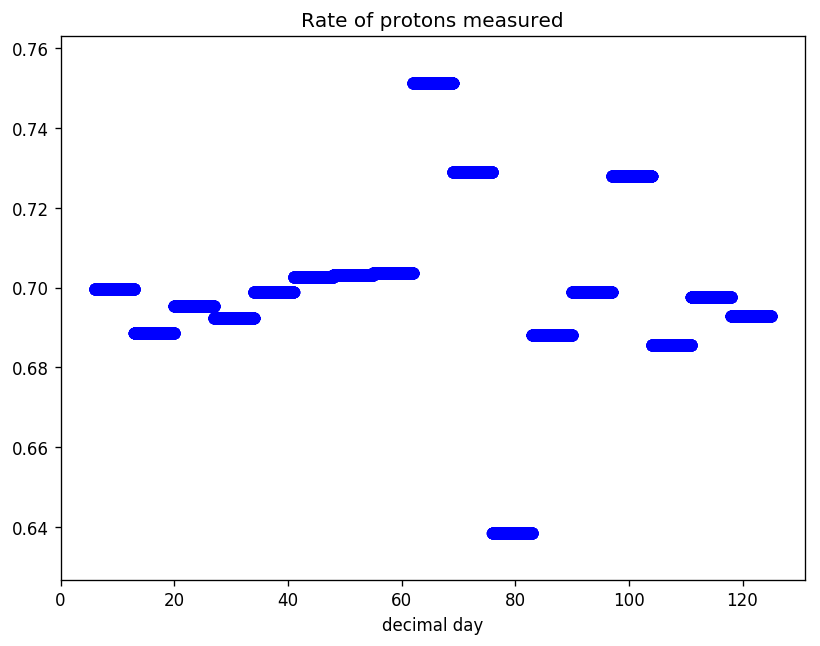

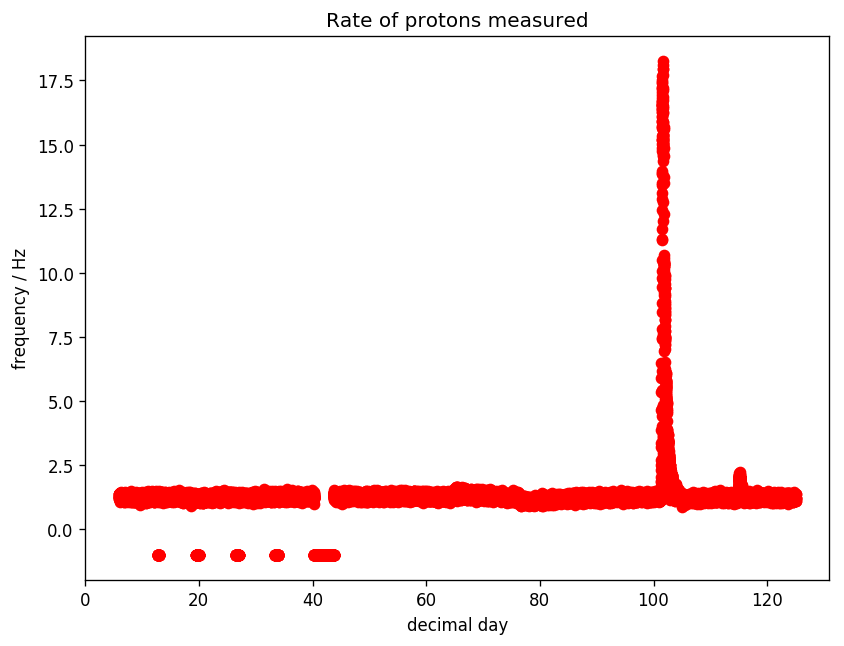

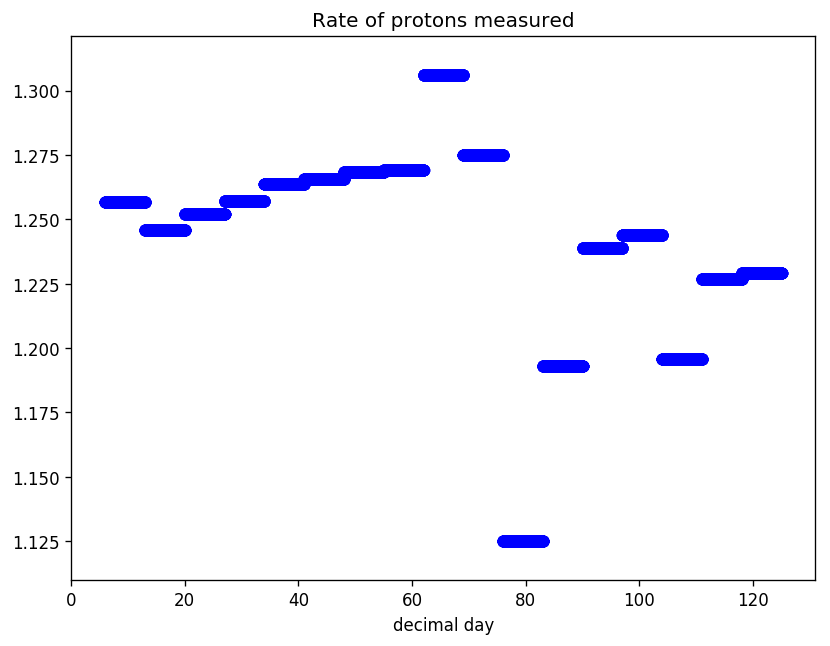

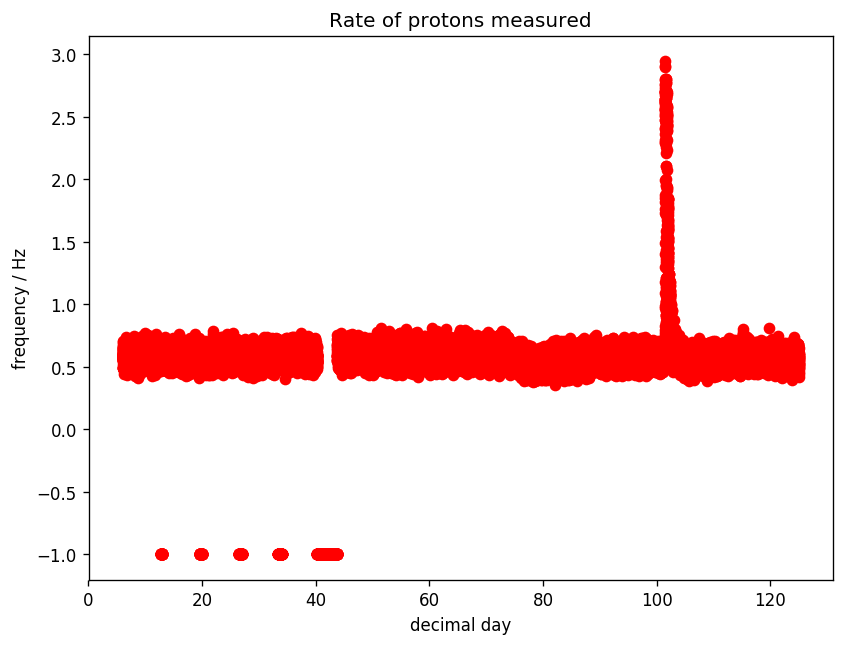

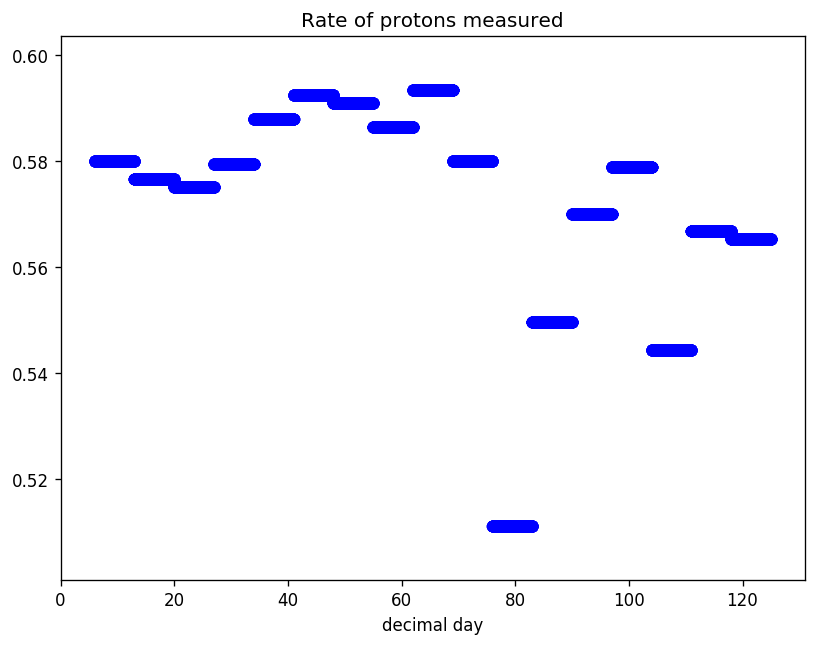

In [17]:
x =  output_data[53]['decimal_day']
pr = output_data[53]['rate_proton_measured']
y = np.array_split(pr, range(len(pr[0])), axis = 1)
bk = np.array_split(output_data[53]['proton_background'], range(len(output_data[53]['proton_background'][0])), axis =1)
for i in range(len(pr[0])):
    
    fig = plt.figure(figsize=(8, 6), dpi=120)
    ax = fig.add_subplot(111)
    plt.title('Rate of protons measured')
    plt.xlabel('decimal day')
    plt.ylabel('frequency / Hz')
    ax.scatter(x, y[i+1], color = 'r')
    plt.show()
    
    fig = plt.figure(figsize=(8, 6), dpi=120)
    ax = fig.add_subplot(111)
    plt.title('Proton background for given energy')
    plt.title('Rate of protons measured')
    plt.xlabel('decimal day')
    ax.scatter(x, bk[i+1], color = 'b')
    plt.show()
